In [1]:
%matplotlib notebook
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from matplotlib import cm


In [2]:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

dfT = df.T

In [3]:
dfT
dfdscr = (dfT).describe()
dfdscr = dfdscr[0:-5]
dfdscr

1992          1993           1994          1995
count    3650.000000   3650.000000    3650.000000   3650.000000
mean    33312.107476  41861.859541   39493.304941  47743.550969
std    200630.901553  98398.356203  140369.925240  69781.185469

In [4]:
df = dfdscr.T
df
Yline = 36000
df['dif'] = Yline - df['mean']#difference between Yline and df[mean]
df['SEM'] = (df['std'])/((df['count'])**0.5) #Standard error of the mean
df['MarginOfError'] = df['SEM']*1.96#*2?# That means the 95% confidence interval (using the +/-1.96 C factor)
#df['sign'] = abs(df['dif'])/df['dif'] #not needed
#df['shade'] = df['dif']/df['MarginOfError'] #not needed
#df['shade2'] = df['shade'].apply(lambda x: 1 if x>1 else -1 if x<-1 else x) #not needed
#df['color'] = df['shade'].apply(lambda x: 'grey' if abs(x)<0.01 else 'green' if x>0 else 'red') #not needed
#df['shade3'] = df['shade2'].apply(lambda x: abs(x)) #not needed
#df['num'] = list([1,50,100,200]) #not needed
colorrange = [x for x in range(0,255)]


#added as test
df['prob'] = st.norm.cdf((Yline - df['mean'])/(df['SEM'])) 
df['colornum'] = (df['prob']*255)
df['colornum'] = abs(df['colornum'].round(0)-255)
df


count          mean            std           dif          SEM  \
1992  3650.0  33312.107476  200630.901553   2687.892524  3320.866311   
1993  3650.0  41861.859541   98398.356203  -5861.859541  1628.701180   
1994  3650.0  39493.304941  140369.925240  -3493.304941  2323.419534   
1995  3650.0  47743.550969   69781.185469 -11743.550969  1155.026400   

      MarginOfError          prob  colornum  
1992    6508.897970  7.908560e-01      53.0  
1993    3192.254314  1.596598e-04     255.0  
1994    4553.902287  6.635266e-02     238.0  
1995    2263.851744  1.386841e-24     255.0

<IPython.core.display.Javascript object>


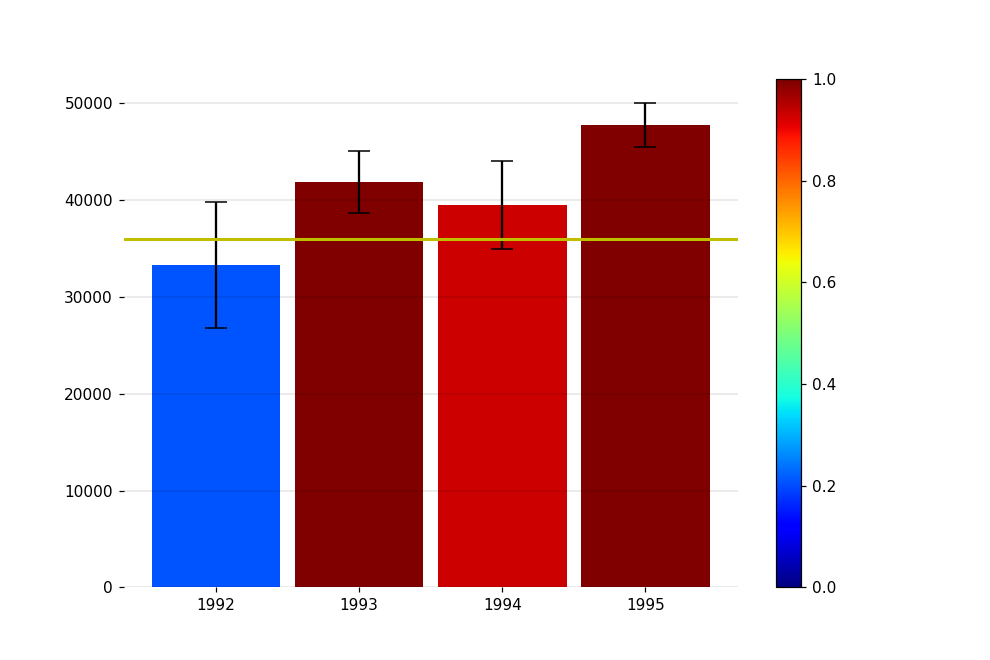

In [5]:

plt.figure(3, figsize=(9,6))
ax = plt.gca()
hLine = plt.axhline(Yline, xmin=0, xmax=1, linewidth=2, color='y', picker=5)
a = matplotlib.cm.get_cmap('seismic')(df['colornum'])
colorlist = [int(c) for c in df['colornum']]
colorlist = np.int64(colorlist)
bars = plt.bar(df.index, df['mean'], width = 0.9, picker=5, color = matplotlib.cm.get_cmap('jet')(colorlist))#matplotlib.cm.get_cmap('seismic')(124)¶


error = plt.errorbar(df.index, df['mean'], yerr=df['MarginOfError'], fmt='None', ecolor='black', capsize=7, errorevery=1, dash_capstyle = 'round', capthick=1)
ticks = plt.xticks(np.arange(df.index[0], (df.index[-1]+1), step=1))

#N = 21 #mappable array
cmap = plt.get_cmap('jet', 255) #or ('winter', N)
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm)#, boundaries=np.arange(-0.05,2.1,.1))
ax.yaxis.grid(which="major", color='black', linestyle='-', linewidth=0.1)

plt.box(on=None)
plt.savefig('Assignment3.png', dpi = 300, frameon = False)
